# Task 1c Solution

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
image_dir = 'data' # image directory relative to this script

--- define the filters to be combined for each channel

In [3]:
filters = {}
filters['B'] = ['f090w']
filters['G'] = ['f150w','f200w']
filters['R'] = ['f277w','f356w','f444w']

--- combine the filters in each channel

In [4]:
im = {} # dictionary to hold the combined images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


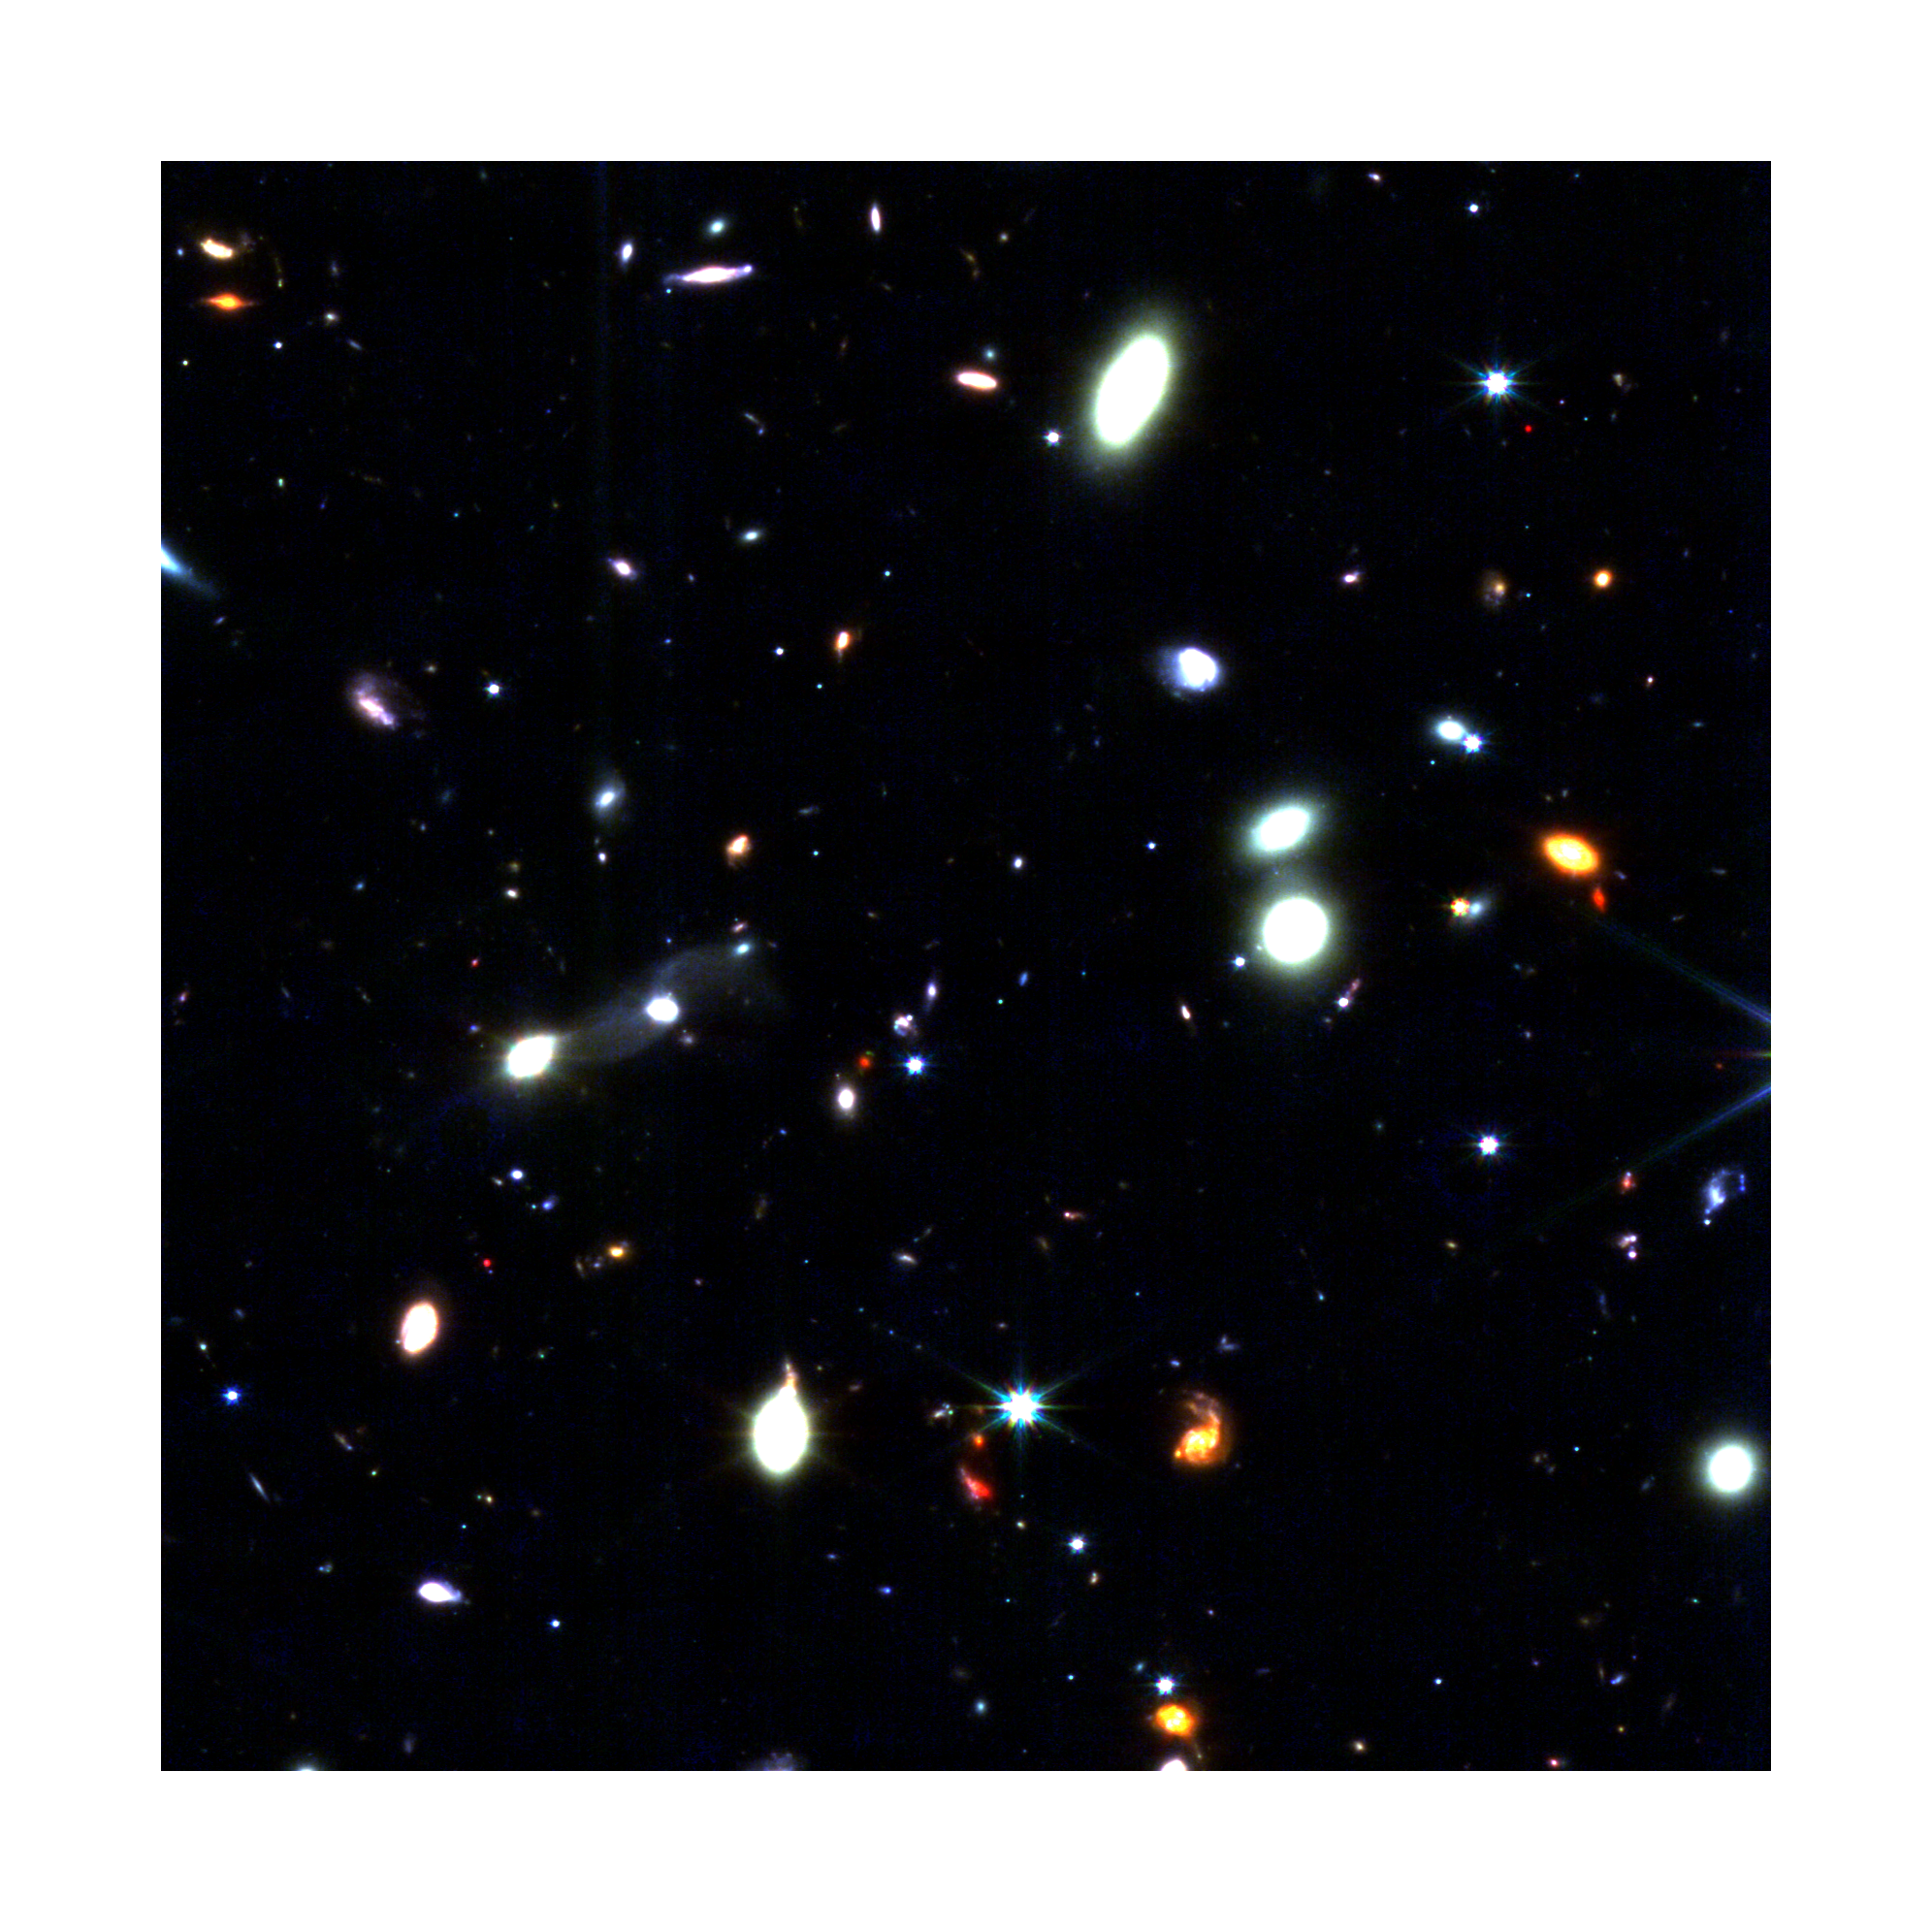

In [5]:
for channel in 'RGB':
    fs = filters[channel]
    sci = {f: fits.getdata(f'{image_dir}/{f}_sci.fits') for f in fs} # read sci images
    wht = {f: fits.getdata(f'{image_dir}/{f}_wht.fits') for f in fs} # read weight images
    shape = next(iter(sci.values())).shape
    combined_sci = np.zeros(shape)   #create empty array to fill combined sci/wht images
    combined_wht = np.zeros(shape)
    for f in fs:
        combined_sci += sci[f] * wht[f]        #combine images from different filters
        combined_wht += wht[f]
    combined_sci /= combined_wht

    # --- clip negative and erroneously high values and rescale values to be 0 - 1
    # --- NOTE: you can play around here to change the colour balance and contrast of your images
    vmin = 0 # exclude negative values (anything less than vmin gets mapped to vmin)
    vmax =  np.percentile(combined_sci[~np.isnan(combined_sci)], 99) # exclude the brightest 1% of pixels (anything above gets mapped to that value)
    norm = cm.colors.Normalize(vmin, vmax) # normalisation function
    combined_sci = norm(combined_sci) # apply normalisation function

    # --- set masked values to zero
    im[channel] = np.ma.filled(combined_sci, 0.0) # return masked array with masked values set to 0.0 (this makes those pixels black)
    
rgb = np.dstack((im['R'],im['G'],im['B'])) # stack images into a single array

dpi = rgb.shape[0] # set dots per inch equal to the number of pixels.
fig = plt.figure(figsize = (1, 1), dpi = dpi)
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels

ax.imshow(rgb) # shouldn't see much because the scale is dominated by outlier pixels
fig.savefig('XDF_rgb.png')

<ipython-input-6-d9ad2ae4248b>:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  centre = rgb[slices]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


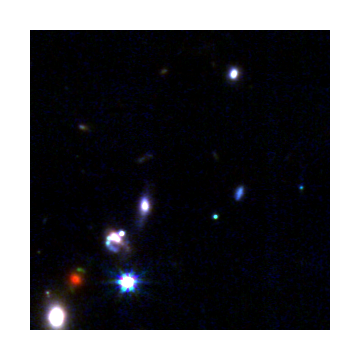

In [6]:
x = rgb.shape[0] // 2 # pixel x-centre of cutout, must be an integer
y = rgb.shape[1] // 2  # pixel y-centre of cutout, must be an integer
r = 150 # width/2 of cutout, must be int

slices = [slice(x-r,x+r,None),slice(y-r,y+r,None)]
centre = rgb[slices]

dpi = centre.shape[0] # set dots per inch equal to the number of pixels.
fig = plt.figure(figsize = (1, 1), dpi = dpi)
ax = fig.add_axes((0.0, 0.0, 1.0, 1.0)) # define axes to cover entire field
ax.axis('off') # turn off axes frame, ticks, and labels

ax.imshow(centre)